In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv('train.csv')
test = pd.read_csv('pred.csv')

In [2]:
train.describe()

,ID,V_Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Label
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,142392.093650,94821.443350,-0.009457,0.005983,-0.010502,0.006385,-0.005044,-0.000935,-0.001108,-0.000414,...,0.003353,-0.000101,-0.001631,-0.000852,0.002414,0.002679,-0.000414,0.111144,0.012771,0.00300
std,82165.039711,47461.683661,1.968967,1.644886,1.561440,1.422307,1.418835,1.340093,1.303380,1.237065,...,0.728089,0.656196,0.604791,0.523744,0.483075,0.408665,0.323821,0.320893,3.862825,0.05469
min,1.000000,0.000000,-41.935438,-63.343454,-48.303055,-5.687074,-113.738416,-21.913391,-37.088733,-73.221625,...,-10.930071,-44.799293,-2.844094,-10.294936,-2.525254,-9.896524,-15.427162,-0.003267,-16.090069,0.00000
25%,71185.500000,54201.750000,-0.923727,-0.598147,-0.888810,-0.847019,-0.691816,-0.766921,-0.552338,-0.208880,...,-0.539972,-0.162463,-0.354622,-0.319043,-0.324796,-0.071722,-0.053242,0.007142,-2.604436,0.00000
50%,142346.000000,84663.500000,0.008932,0.068513,0.179858,-0.017114,-0.054040,-0.274211,0.040992,0.020865,...,0.010180,-0.011512,0.040974,0.014328,-0.051034,0.001623,0.010368,0.027447,0.027612,0.00000
75%,213270.250000,139188.000000,1.310798,0.806537,1.023843,0.750384,0.615247,0.398199,0.572130,0.326519,...,0.533578,0.148826,0.436066,0.351914,0.245014,0.092774,0.078164,0.096529,2.619604,0.00000
max,284806.000000,172793.000000,2.432739,19.157517,4.098074,16.726562,32.899803,73.311142,120.578421,20.011845,...,10.491388,20.819014,4.568903,7.517160,3.450073,31.609667,22.614094,31.900842,17.546574,1.00000


In [18]:
test.dtypes

ID          int64
V_Time    float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
V29       float64
V30       float64
dtype: object

In [4]:
pos = train[train.Label==1]['ID'].count()
nag = train[train.Label==0]['ID'].count()
print(pos,nag)

300 99700


In [30]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from xgboost import plot_importance,plot_tree
test_size = 0.33
seed = 42
X = train.drop(['ID','Label'],axis=1)
y = train.Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [25]:
xgb_clf = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=(nag/pos),
 seed=27)
print('start train')
xgb_clf.fit(X_train,y_train,verbose=True)
print(xgb_clf)
y_pred = xgb_clf.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


start train
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=6, missing=None, n_estimators=1000, nthread=4,
       objective='binary:logistic', reg_alpha=0.005, reg_lambda=1,
       scale_pos_weight=332.33333333333331, seed=27, silent=True,
       subsample=0.8)
Accuracy: 99.93%


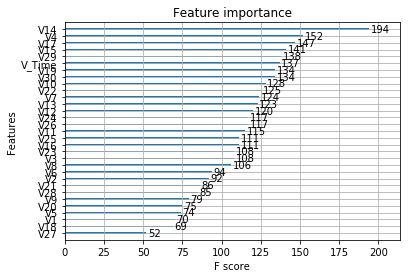

In [28]:
plot_importance(xgb_clf)
pyplot.show()